In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install tensorflow numpy matplotlib opencv-python pillow requests scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


2025-07-04 05:31:31.080926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751607091.270635      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751607091.330695      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🚀 Simple Space Image Classifier

📊 Creating dataset...
Creating synthetic space images...
Creating Galaxy images...
Creating Nebula images...
Creating Star_Cluster images...
Creating Planet images...
Creating Deep_Space images...
✓ Created 75 total images

🔧 Preprocessing images...

✂️ Splitting data...
Training images: 41
Validation images: 11
Test images: 23

🤖 Building AI model...
Building the AI model...


I0000 00:00:1751607104.525824      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✓ Model built successfully!

🎯 Training the model...
Training the model...
Epoch 1/10


I0000 00:00:1751607117.521809      61 service.cc:148] XLA service 0x7d7988003090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751607117.523161      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751607118.954554      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 28s 14s/step - accuracy: 0.2500 - loss: 1.7417

I0000 00:00:1751607122.000702      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.2147 - loss: 1.6993 - val_accuracy: 0.4545 - val_loss: 1.5698
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4226 - loss: 1.5320 - val_accuracy: 0.3636 - val_loss: 1.5109
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4070 - loss: 1.4703 - val_accuracy: 0.2727 - val_loss: 1.4678
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4226 - loss: 1.3643 - val_accuracy: 0.4545 - val_loss: 1.4362
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4495 - loss: 1.2920 - val_accuracy: 0.3636 - val_loss: 1.3467
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5149 - loss: 1.2100 - val_accuracy: 0.7273 - val_loss: 1.2236
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7530 - loss: 1.1290 - val_accuracy: 0.7273 - val_loss: 1.1405
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8565 - loss: 1.0738 - val_accuracy: 0.8182 - val_loss: 1.0857
Epoch 9/10
3

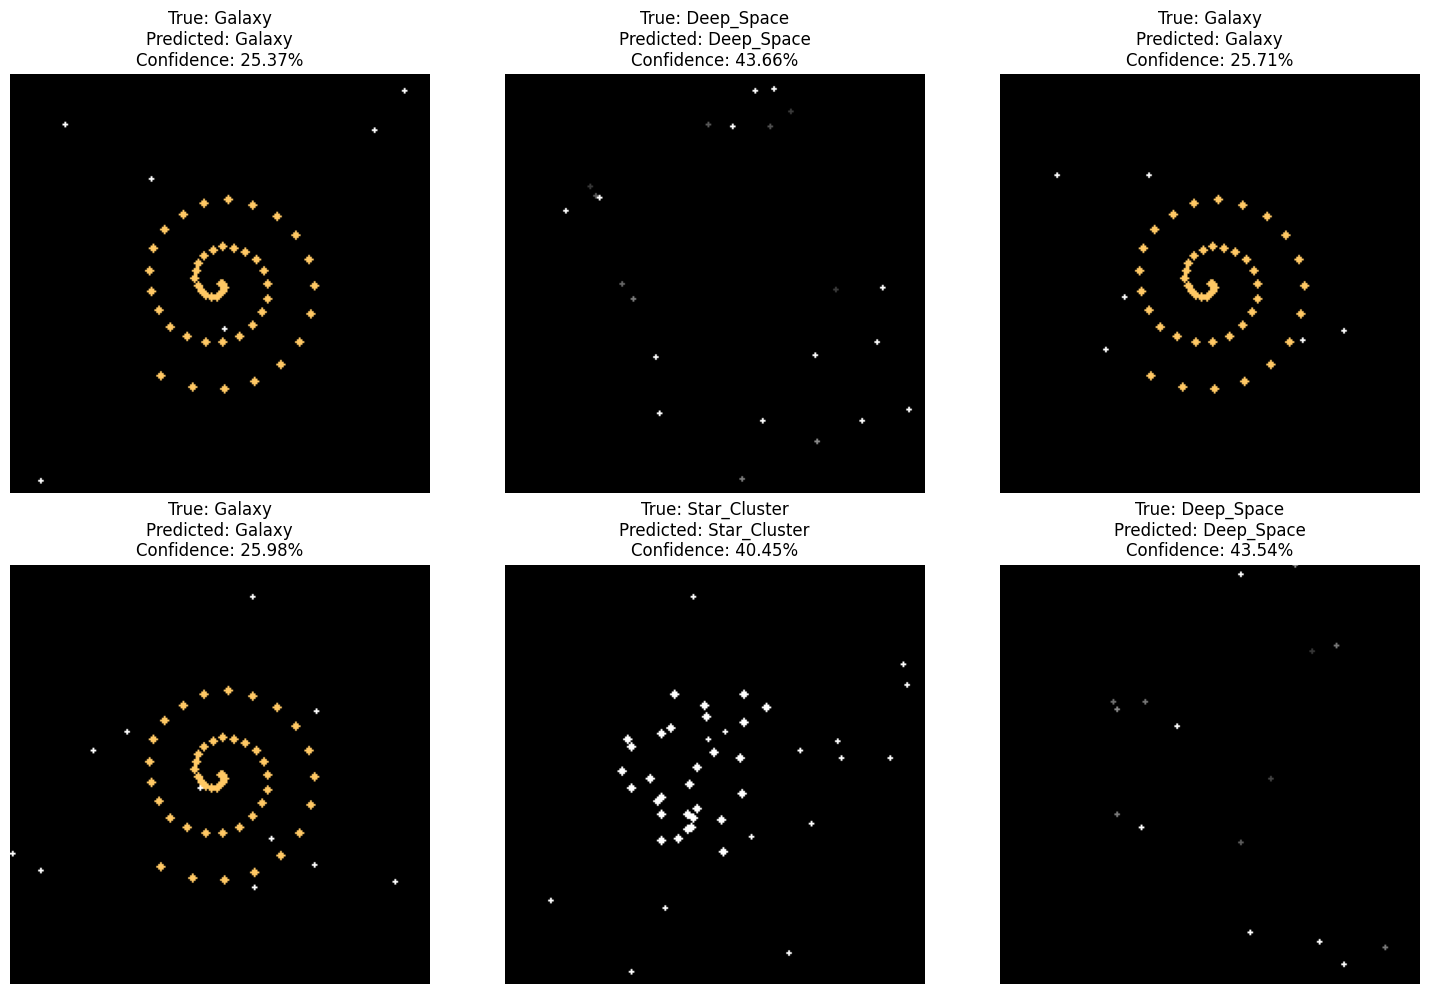

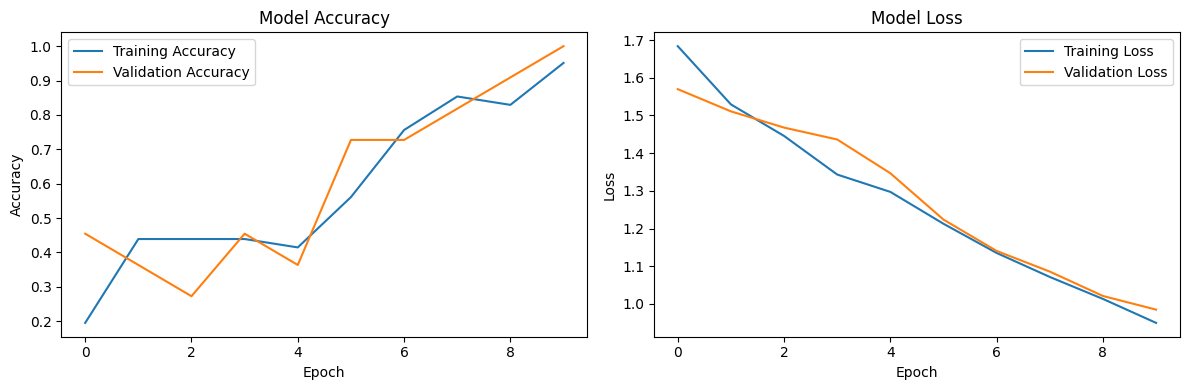


🎉 Project completed!
Final accuracy: 95.65%

What you learned:
• How to create synthetic space images
• How to build an AI model with ResNet50
• How to train and test a deep learning model
• How to classify space objects automatically


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random

class SimpleSpaceClassifier:
    """
    A simple space image classifier for beginners
    """
    
    def __init__(self):
        # Basic settings
        self.img_size = (224, 224)  # Image size for ResNet50
        self.classes = ['Galaxy', 'Nebula', 'Star_Cluster', 'Planet', 'Deep_Space']
        self.num_classes = len(self.classes)
        self.model = None
    
    def create_sample_image(self, class_type, sample_num):
        """
        Create a simple synthetic space image
        """
        # Start with black space background
        img = np.zeros((224, 224, 3), dtype=np.uint8)
        
        # Add random stars to all images
        for _ in range(random.randint(5, 15)):
            x = random.randint(0, 223)
            y = random.randint(0, 223)
            cv2.circle(img, (x, y), 1, (255, 255, 255), -1)
        
        if class_type == 0:  # Galaxy
            # Draw a simple spiral galaxy
            center = (112, 112)
            for i in range(50):
                angle = i * 0.3
                radius = i * 1.2
                x = int(center[0] + radius * np.cos(angle))
                y = int(center[1] + radius * np.sin(angle))
                if 0 <= x < 224 and 0 <= y < 224:
                    cv2.circle(img, (x, y), 2, (255, 200, 100), -1)
        
        elif class_type == 1:  # Nebula
            # Create colorful nebula clouds
            for _ in range(3):
                x = random.randint(50, 174)
                y = random.randint(50, 174)
                radius = random.randint(20, 40)
                color = [random.randint(100, 255), random.randint(100, 255), random.randint(100, 255)]
                cv2.circle(img, (x, y), radius, color, -1)
        
        elif class_type == 2:  # Star Cluster
            # Create a cluster of bright stars
            center = (112, 112)
            for _ in range(30):
                angle = random.uniform(0, 2 * np.pi)
                radius = random.randint(10, 50)
                x = int(center[0] + radius * np.cos(angle))
                y = int(center[1] + radius * np.sin(angle))
                if 0 <= x < 224 and 0 <= y < 224:
                    cv2.circle(img, (x, y), 2, (255, 255, 255), -1)
        
        elif class_type == 3:  # Planet
            # Draw a simple planet
            center = (112, 112)
            cv2.circle(img, center, 50, (100, 150, 200), -1)  # Blue planet
            # Add some surface features
            cv2.circle(img, (100, 100), 15, (80, 120, 180), -1)
            cv2.circle(img, (130, 120), 20, (80, 120, 180), -1)
        
        else:  # Deep Space
            # Just add more distant stars
            for _ in range(10):
                x = random.randint(0, 223)
                y = random.randint(0, 223)
                brightness = random.randint(50, 150)
                cv2.circle(img, (x, y), 1, (brightness, brightness, brightness), -1)
        
        return img
    
    def create_dataset(self, samples_per_class=20):
        """
        Create a simple dataset of space images
        """
        print("Creating synthetic space images...")
        
        images = []
        labels = []
        
        # Create images for each class
        for class_idx in range(self.num_classes):
            print(f"Creating {self.classes[class_idx]} images...")
            
            for sample_idx in range(samples_per_class):
                img = self.create_sample_image(class_idx, sample_idx)
                images.append(img)
                labels.append(class_idx)
        
        print(f"✓ Created {len(images)} total images")
        return np.array(images), np.array(labels)
    
    def preprocess_data(self, images):
        """
        Simple preprocessing: normalize images
        """
        # Convert to float and normalize to 0-1 range
        images = images.astype('float32') / 255.0
        return images
    
    def build_model(self):
        """
        Build a simple model using ResNet50
        """
        print("Building the AI model...")
        
        # Load pre-trained ResNet50 (without top classification layer)
        base_model = ResNet50(weights='imagenet', include_top=False, 
                             input_shape=(224, 224, 3))
        
        # Freeze the base model (don't train it)
        base_model.trainable = False
        
        # Build our model
        self.model = Sequential([
            base_model,                           # Pre-trained ResNet50
            GlobalAveragePooling2D(),            # Convert to 1D
            Dense(64, activation='relu'),         # Hidden layer
            Dense(self.num_classes, activation='softmax')  # Output layer
        ])
        
        # Compile the model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("✓ Model built successfully!")
    
    def train_model(self, X_train, y_train, X_val, y_val):
        """
        Train the model
        """
        print("Training the model...")
        
        # Train for 10 epochs (10 complete passes through the data)
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=10,
            batch_size=16,
            verbose=1
        )
        
        print("✓ Training completed!")
        return history
    
    def predict_image(self, image):
        """
        Predict what type of space object is in the image
        """
        # Preprocess the image
        img_processed = self.preprocess_data(np.array([image]))
        
        # Make prediction
        prediction = self.model.predict(img_processed, verbose=0)
        
        # Get the class with highest probability
        predicted_class = np.argmax(prediction[0])
        confidence = prediction[0][predicted_class]
        
        return predicted_class, confidence
    
    def show_results(self, images, labels, num_samples=6):
        """
        Show some sample images with predictions
        """
        plt.figure(figsize=(15, 10))
        
        for i in range(min(num_samples, len(images))):
            plt.subplot(2, 3, i+1)
            
            # Show the image
            plt.imshow(images[i])
            
            # Make prediction
            predicted_class, confidence = self.predict_image(images[i])
            
            # Create title with true and predicted labels
            true_label = self.classes[labels[i]]
            predicted_label = self.classes[predicted_class]
            
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nConfidence: {confidence:.2%}')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def evaluate_model(self, X_test, y_test):
        """
        Test how well our model performs
        """
        print("Testing the model...")
        
        # Make predictions on test set
        predictions = self.model.predict(X_test, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Calculate accuracy
        accuracy = np.mean(predicted_classes == y_test)
        print(f"Model Accuracy: {accuracy:.2%}")
        
        return accuracy

def main():
    """
    Main function - this is where everything runs
    """
    print("🚀 Simple Space Image Classifier")
    print("=" * 40)
    
    # Step 1: Create the classifier
    classifier = SimpleSpaceClassifier()
    
    # Step 2: Create dataset
    print("\n📊 Creating dataset...")
    images, labels = classifier.create_dataset(samples_per_class=15)
    
    # Step 3: Preprocess the data
    print("\n🔧 Preprocessing images...")
    images = classifier.preprocess_data(images)
    
    # Step 4: Split data into training and testing sets
    print("\n✂️ Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.3, random_state=42
    )
    
    # Further split training data to get validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    print(f"Training images: {len(X_train)}")
    print(f"Validation images: {len(X_val)}")
    print(f"Test images: {len(X_test)}")
    
    # Step 5: Build the AI model
    print("\n🤖 Building AI model...")
    classifier.build_model()
    
    # Step 6: Train the model
    print("\n🎯 Training the model...")
    history = classifier.train_model(X_train, y_train, X_val, y_val)
    
    # Step 7: Test the model
    print("\n📈 Testing the model...")
    accuracy = classifier.evaluate_model(X_test, y_test)
    
    # Step 8: Show some results
    print("\n🖼️ Showing predictions...")
    # Convert test images back to 0-255 range for display
    test_images_display = (X_test * 255).astype(np.uint8)
    classifier.show_results(test_images_display, y_test)
    
    # Step 9: Show training progress
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎉 Project completed!")
    print(f"Final accuracy: {accuracy:.2%}")
    print("\nWhat you learned:")
    print("• How to create synthetic space images")
    print("• How to build an AI model with ResNet50")
    print("• How to train and test a deep learning model")
    print("• How to classify space objects automatically")

# Run the program
if __name__ == "__main__":
    main()